### Importing libraries

In [58]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import shutil
import random
import xml.etree.ElementTree as ET
from PIL import Image

### Defining the path to dataset folders

In [19]:
image_folder = "data\images\Images"
annotation_folder = "data\annotations\Annotation"

In [25]:
# os.listdir(image_folder)

### Cleaning Folder Names: 
**Removing Unnecessary Numbering**

In [26]:
def clean_class_name(class_name):
    return "-".join(class_name.split("-")[1:])

### Number of Classes & Images per Class

In [27]:
class_counts = {}
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        cleaned_name = clean_class_name(class_name) 
        class_counts[cleaned_name] = num_images

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Num Images"])

In [29]:
num_classes = len(df)
print(f"Total number of classes: {num_classes}")

Total number of classes: 120


In [42]:
df

,Class,Num Images
0,Chihuahua,152
1,Japanese_spaniel,185
2,Maltese_dog,252
3,Pekinese,149
4,Shih-Tzu,214
...,...,...
115,standard_poodle,159
116,Mexican_hairless,155
117,dingo,156
118,dhole,150


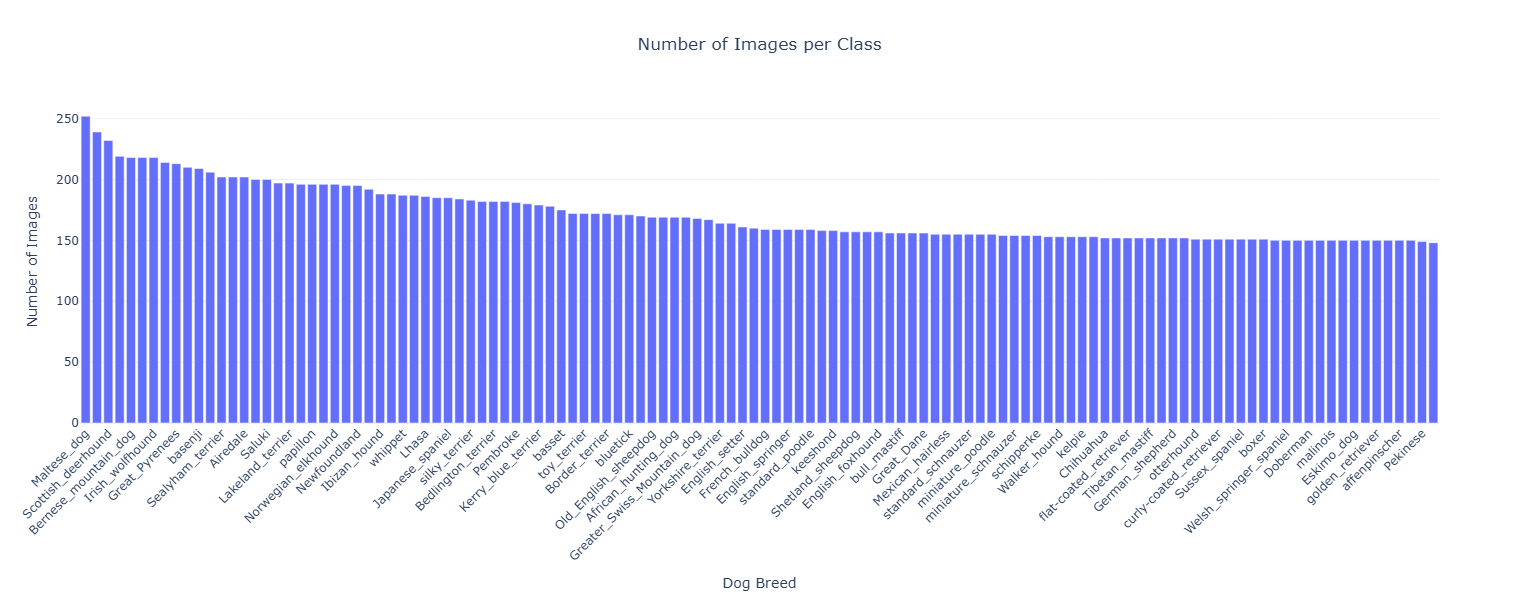

In [40]:
fig = px.bar(df.sort_values("Num Images", ascending=False), 
             x="Class", 
             y="Num Images", 
             title="Number of Images per Class",
             labels={"Class": "Dog Breed", "Num Images": "Number of Images"},
             template="plotly_white") 

fig.update_layout(
    title_x=0.5,
    xaxis_tickangle=-45, 
    yaxis=dict(showgrid=True),
    width=1500, 
    height=600
)

fig.show()

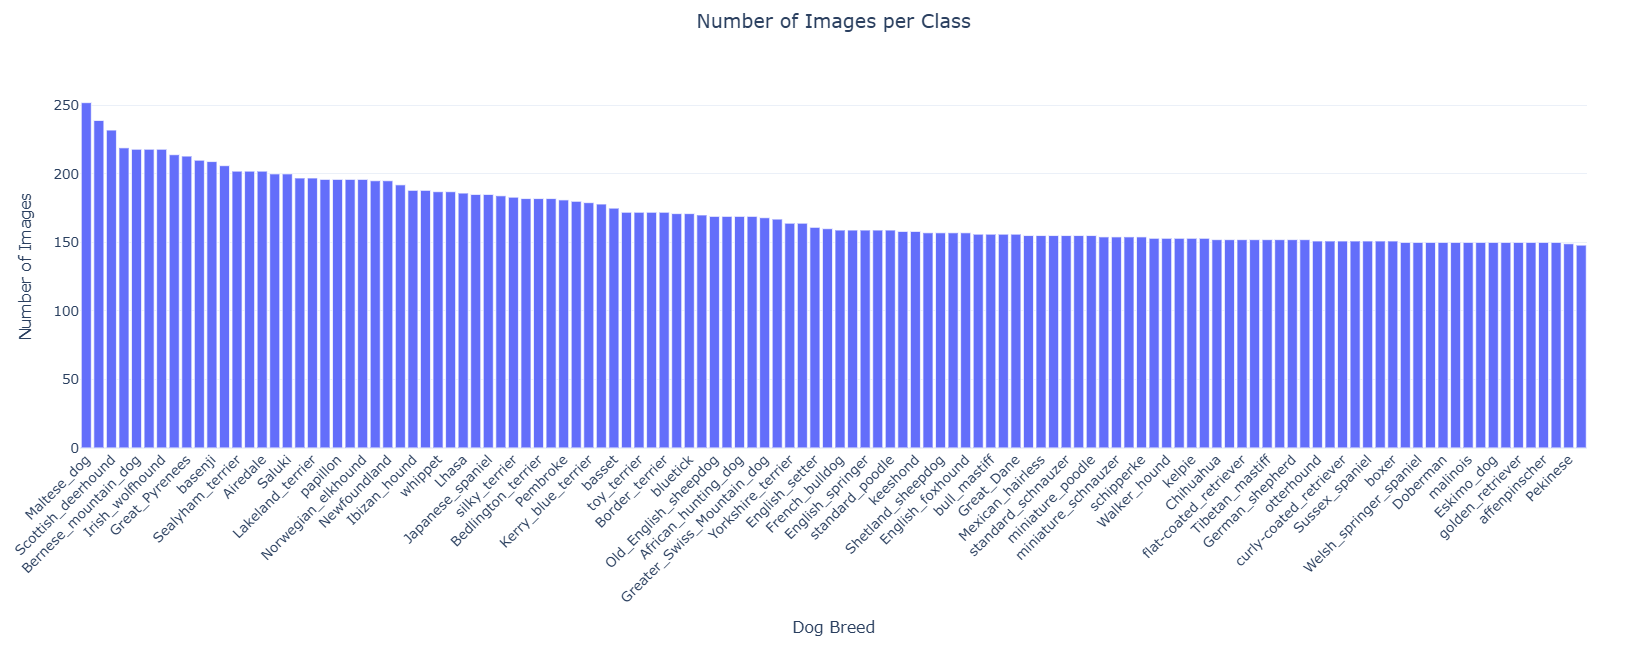

### Splitting the Dataset

**save into folders: test & train & val**

In [46]:
def split_dataset(image_folder, output_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(output_path, split), exist_ok=True)

    for class_name in os.listdir(image_folder):
        class_path = os.path.join(image_folder, class_name)

        if os.path.isdir(class_path): 
            images = os.listdir(class_path)
            random.shuffle(images)  

            total_images = len(images)
            train_size = int(total_images * train_ratio)
            val_size = int(total_images * val_ratio)

            train_images = images[:train_size]
            val_images = images[train_size:train_size + val_size]
            test_images = images[train_size + val_size:]

            def copy_images(image_list, split_name):
                split_class_path = os.path.join(output_path, split_name, class_name)
                os.makedirs(split_class_path, exist_ok=True)
                
                for img in image_list:
                    src = os.path.join(class_path, img)
                    dst = os.path.join(split_class_path, img)
                    shutil.copy2(src, dst)

            copy_images(train_images, "train")
            copy_images(val_images, "val")
            copy_images(test_images, "test")

    print("finished!")

output_path = "data\images\split_dataset"
split_dataset(image_folder, output_path)

finished!


### The number of images in each dataset split

In [51]:
split_totals = {}

In [52]:
for split in ["train", "val", "test"]:
    split_path = os.path.join(output_path, split)
    total_images = 0
    
    for class_name in os.listdir(split_path):
        class_folder = os.path.join(split_path, class_name)
        if os.path.isdir(class_folder):
            num_images = len(os.listdir(class_folder))
            total_images += num_images

    split_totals[split] = total_images

In [53]:
for split, count in split_totals.items():
    print(f"Total images in {split}: {count}")

Total images in train: 16418
Total images in val: 2009
Total images in test: 2153


### Visualization of class images

In [63]:
def show_sample_images(train_folder, num_classes=5, num_images=5):
    class_names = random.sample(os.listdir(train_folder), num_classes)
    
    fig, axes = plt.subplots(num_classes, num_images, figsize=(12, num_classes * 2))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(image_folder, class_name)
        image_names = random.sample(os.listdir(class_path), num_images)

        for j, img_name in enumerate(image_names):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert("RGB") 
            
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=10)

    plt.tight_layout()
    plt.show()

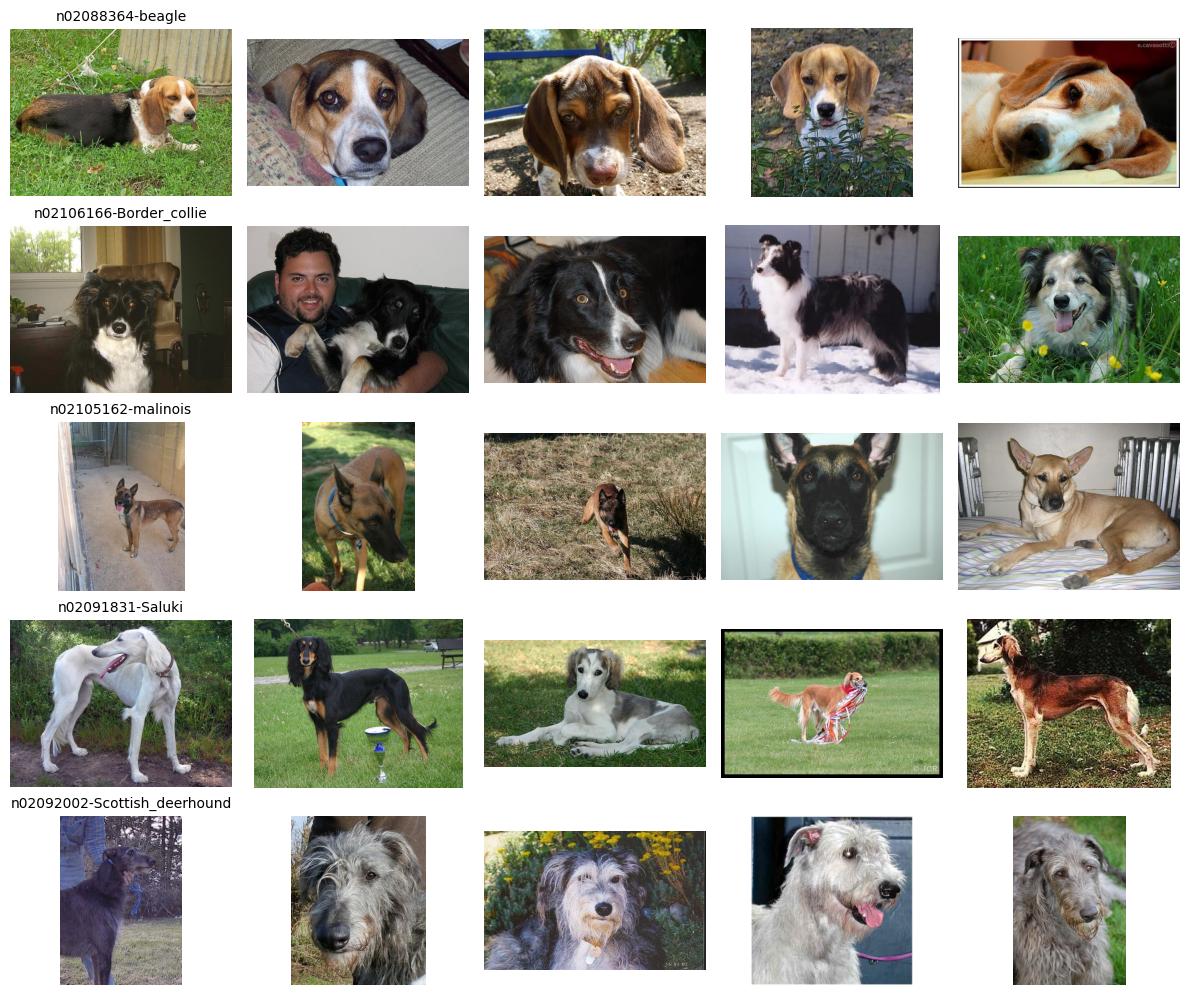

In [64]:
train_folder = "data/images/split_dataset/train"  
show_sample_images(image_folder)